1. Understanding the dataset

In [42]:
#Load the dataset using pandas
import pandas as pd
sp_file_path = '/kaggle/input/student-performance-data-set/student-por.csv'
sp_data = pd.read_csv(sp_file_path) 

In [43]:
#display the first 5 rows of the dataset
sp_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [44]:
#Show the summary of the dataset (number of rows, columns and data types)
num_rows, num_columns = sp_data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}\n")

print("Data types of each column:")
print(sp_data.dtypes)

Number of rows: 649
Number of columns: 33

Data types of each column:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


2. Descriptive Statistics:

In [45]:
subjects = ['G1', 'G2', 'G3']

# Calculate mean, median, and standard deviation
for col in subjects:
    print(f"Statistics for {col}:")
    print(f"Mean: {sp_data[col].mean()}")
    print(f"Median: {sp_data[col].median()}")
    print(f"Standard Deviation: {sp_data[col].std()}\n")

Statistics for G1:
Mean: 11.399075500770415
Median: 11.0
Standard Deviation: 2.745265128446372

Statistics for G2:
Mean: 11.570107858243452
Median: 11.0
Standard Deviation: 2.913638664303867

Statistics for G3:
Mean: 11.906009244992296
Median: 12.0
Standard Deviation: 3.230656242804805



In [46]:
#Find the minimum and maximum scores for each subject
for col in subjects:
    print(f"{col}")
    print(f"Maximum: {sp_data[col].max()}")
    print(f"Minimum: {sp_data[col].min()}")

G1
Maximum: 19
Minimum: 0
G2
Maximum: 19
Minimum: 0
G3
Maximum: 19
Minimum: 0


3. Data Visualisations

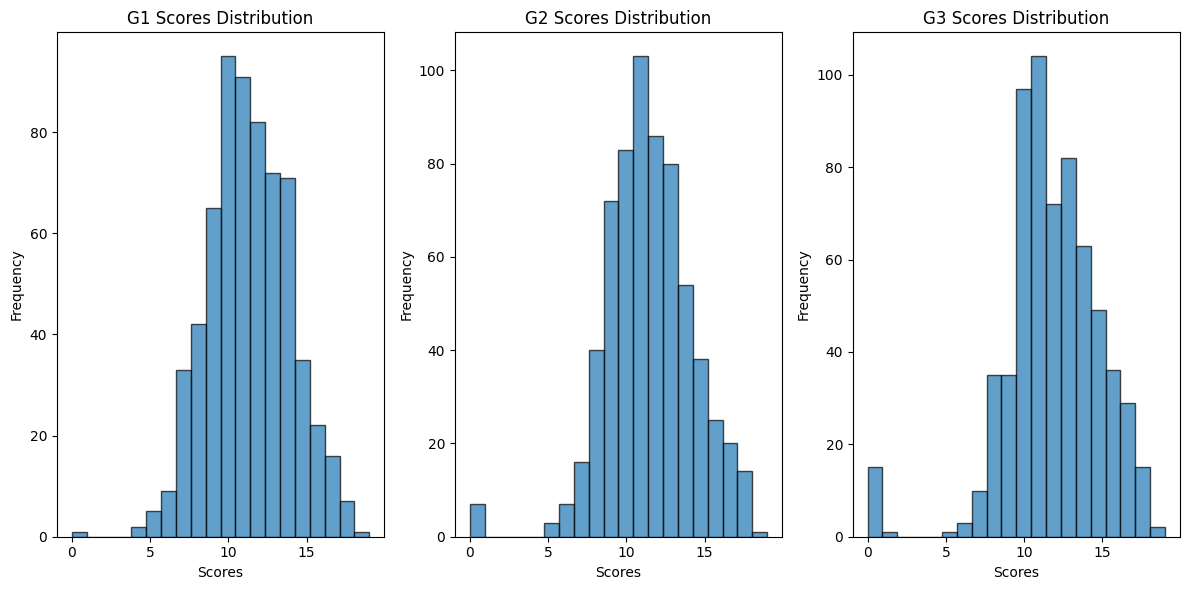

In [47]:
#Create a histogram for the distribution of scores in math, reading, and writing.
import matplotlib.pyplot as plt

subjects = ['G1', 'G2', 'G3']

# Create a figure with subplots for each subject
plt.figure(figsize=(12, 6))

# Iterate through the subjects and create a histogram for each
for i, subject in enumerate(subjects, start=1):
    plt.subplot(1, 3, i)  # Create a 1x3 grid of subplots
    plt.hist(sp_data[subject], bins=20, edgecolor='black', alpha=0.7)  # Create histogram
    plt.title(f'{subject} Scores Distribution')  # Set title for each subplot
    plt.xlabel('Scores')  # Set x-axis label
    plt.ylabel('Frequency')  # Set y-axis label

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

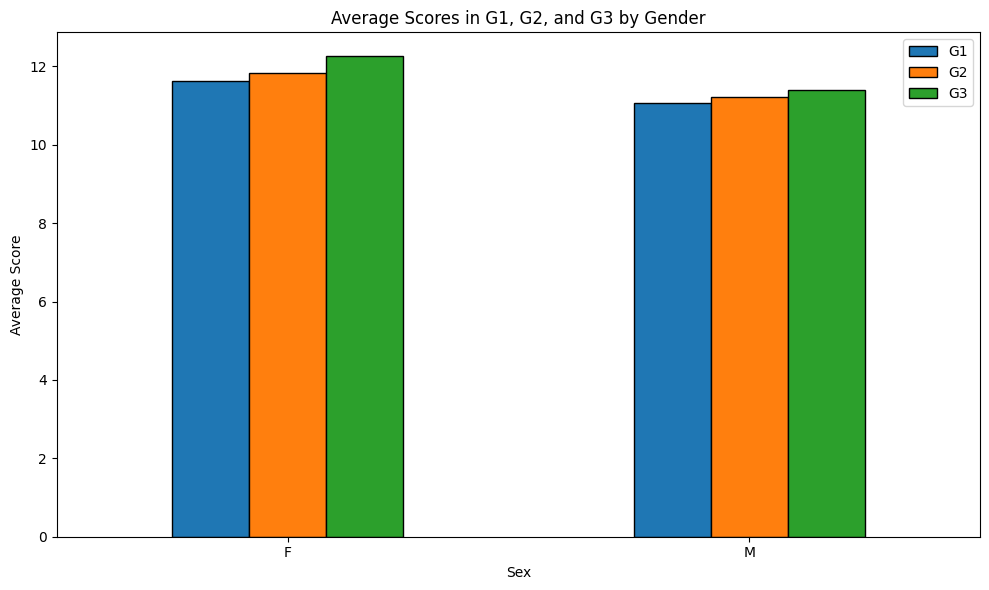

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'gender' is a column in your 'sp_data' DataFrame
# Calculate the average score in each subject, categorized by gender
subjects = ['G1', 'G2', 'G3']
avg_scores = sp_data[subjects + ['sex']].groupby('sex').mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Create a bar plot for each subject
avg_scores.plot(kind='bar', figsize=(10, 6), edgecolor='black')

# Set the labels and title
plt.title('Average Scores in G1, G2, and G3 by Gender')
plt.xlabel('Sex')
plt.ylabel('Average Score')

# Show the plot
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


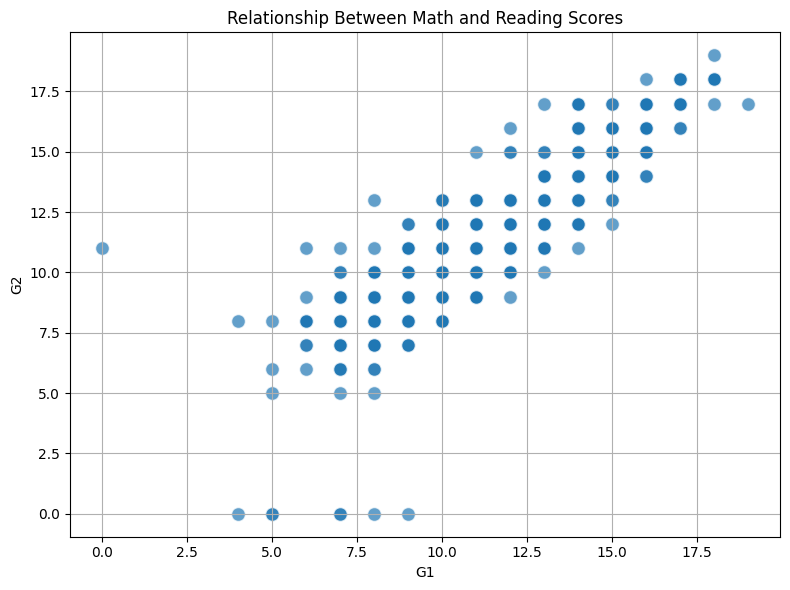

In [49]:
#Use a scatter plot to show the relationship between math scores and reading scores
import matplotlib.pyplot as plt

# Scatter plot to show the relationship between G1 and G2 scores
plt.figure(figsize=(8, 6))

# Plot G1 scores against G2 scores
plt.scatter(sp_data['G1'], sp_data['G2'], alpha=0.7, edgecolors='w', s=100)

# Set the title and labels
plt.title('Relationship Between Math and Reading Scores')
plt.xlabel('G1')
plt.ylabel('G2')

# Show grid for better visualization
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

4. Categorical Data Analysis

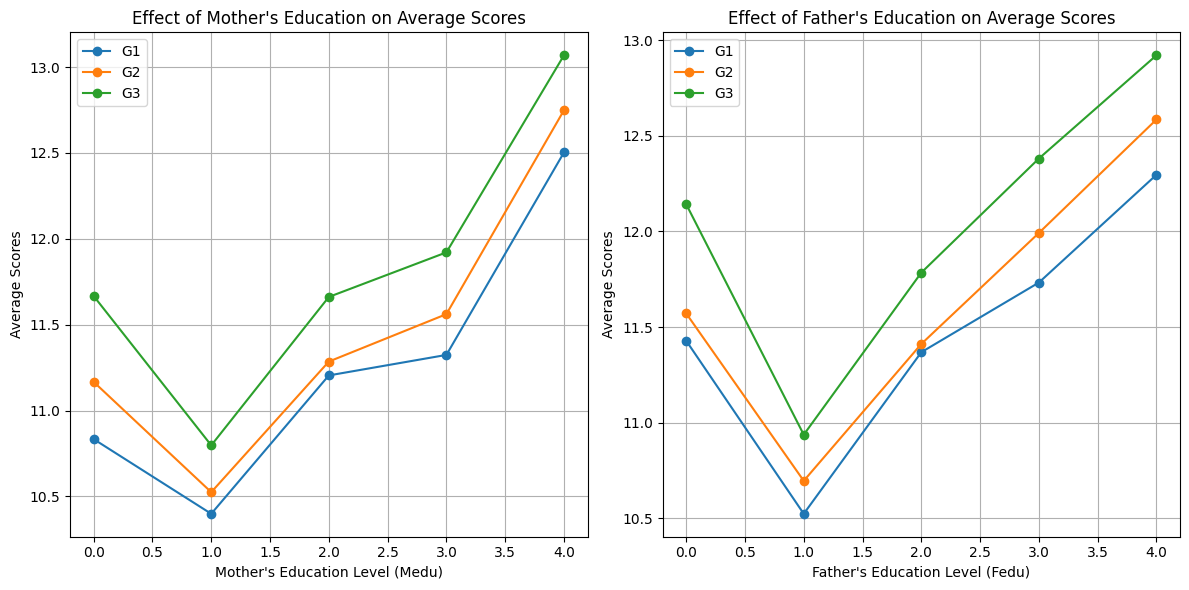

In [50]:
# Analyze the effect of parental education level on the average scores.
# Does it impact students' performance?
# Calculate average scores (G1, G2, G3) by mother's and father's education level
parental_impact = sp_data[['Medu', 'Fedu', 'G1', 'G2', 'G3']]

# Group by mother's education (Medu) and calculate the mean scores
medu_avg_scores = parental_impact.groupby('Medu')[['G1', 'G2', 'G3']].mean()

# Group by father's education (Fedu) and calculate the mean scores
fedu_avg_scores = parental_impact.groupby('Fedu')[['G1', 'G2', 'G3']].mean()

# Plot the impact of mother's education
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
medu_avg_scores.plot(kind='line', marker='o', ax=plt.gca())
plt.title("Effect of Mother's Education on Average Scores")
plt.xlabel("Mother's Education Level (Medu)")
plt.ylabel("Average Scores")
plt.grid(True)

# Plot the impact of father's education
plt.subplot(1, 2, 2)
fedu_avg_scores.plot(kind='line', marker='o', ax=plt.gca())
plt.title("Effect of Father's Education on Average Scores")
plt.xlabel("Father's Education Level (Fedu)")
plt.ylabel("Average Scores")
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

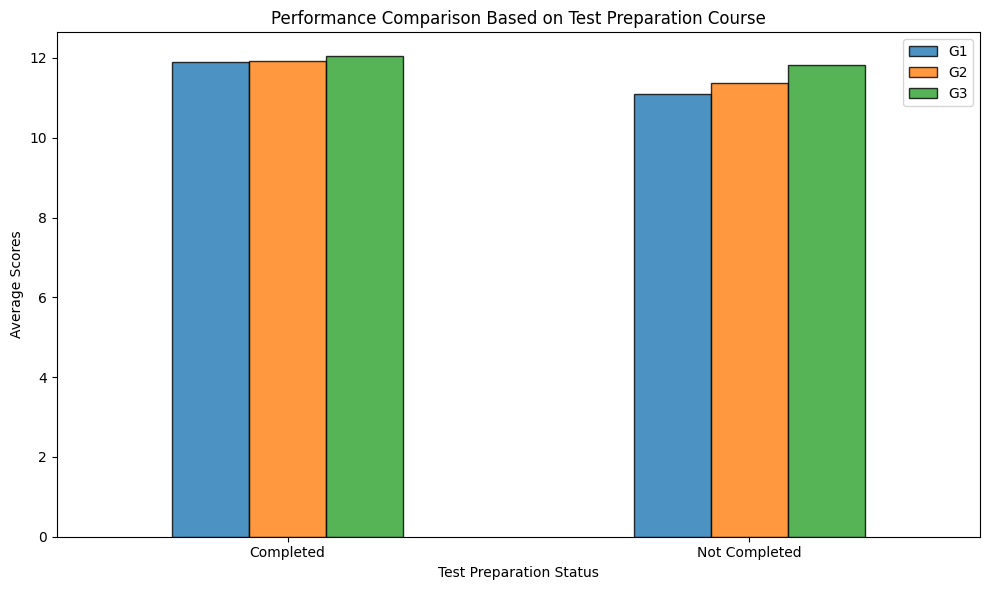

In [51]:
# Compare the performance of students who completed the test preparation course versus those who did not.

sp_data['test_preparation'] = sp_data['absences'].apply(lambda x: 'Completed' if x == 0 else 'Not Completed')

# Group by test preparation status and calculate the mean scores
test_prep_comparison = sp_data.groupby('test_preparation')[['G1', 'G2', 'G3']].mean()

# Plot the results
plt.figure(figsize=(10, 6))

# Create a bar chart for each score
test_prep_comparison.plot(kind='bar', figsize=(10, 6), edgecolor='black', alpha=0.8)

# Add titles and labels
plt.title('Performance Comparison Based on Test Preparation Course')
plt.xlabel('Test Preparation Status')
plt.ylabel('Average Scores')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()



4. Insights:
* Impact of students' gender: Girls are able to score little higher than boys.
* Students with more educated parents tend to score better.
* Test preparation (considering this with completion of the course by not being absent) has negligible effect, but it can be observed that those who attended each class were score little higher than those who were absent. 